In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [96]:
filename = 'C:/Users/Bala Krishna Baddi/An IBM Data Science Professional certificate/Data Analysis with python/auto.csv'
df = pd.read_csv(filename,header=None)

headers = ["symboling","normalized_losses","make","fuel_type","aspiration", "num_of_doors","body_style",
         "drive_wheels","engine_location","wheel_base", "length","width","height","curb_weight","engine_type",
         "num_of_cylinders", "engine_size","fuel_system","bore","stroke","compression_ratio","horsepower",
         "peak_rpm","city_mpg","highway_mpg","price"]
df.columns=headers

In [97]:
#replacing ? with np.nan
df.replace('?',np.nan,inplace=True)
df= df.dropna(subset=['price'],axis=0)

In [98]:
#getting missed columns
missed_cols = [n for n in df.columns if df[n].isnull().sum()>0]
df[missed_cols].isnull().sum()

normalized_losses    37
num_of_doors          2
bore                  4
stroke                4
horsepower            2
peak_rpm              2
dtype: int64

In [99]:
df[missed_cols].describe()

,normalized_losses,num_of_doors,bore,stroke,horsepower,peak_rpm
count,164,199,197,197,199,199
unique,51,2,38,36,58,22
top,161,four,3.62,3.40,68,5500
freq,11,113,23,19,19,36


In [100]:
df[['normalized_losses','bore','stroke','horsepower','peak_rpm','price']] = df[['normalized_losses',\
                                                                                'bore','stroke','horsepower','peak_rpm',\
                                                                                'price']].astype(float)

## Now will replace missed values with np.mean()

In [101]:
#for the num of doors we need to replace with median.
df[missed_cols].describe(include='all')

,normalized_losses,num_of_doors,bore,stroke,horsepower,peak_rpm
count,164.000000,199,197.000000,197.000000,199.000000,199.000000
unique,NaN,2,NaN,NaN,NaN,NaN
top,NaN,four,NaN,NaN,NaN,NaN
freq,NaN,113,NaN,NaN,NaN,NaN
mean,122.000000,NaN,3.330711,3.256904,103.396985,5117.587940
std,35.442168,NaN,0.270793,0.319256,37.553843,480.521824
min,65.000000,NaN,2.540000,2.070000,48.000000,4150.000000
25%,94.000000,NaN,3.150000,3.110000,70.000000,4800.000000
50%,115.000000,NaN,3.310000,3.290000,95.000000,5200.000000
75%,150.000000,NaN,3.590000,3.410000,116.000000,5500.000000


In [102]:
#replacing to value with four...remaiing wiht mean

means = list(df[missed_cols].describe(include='all').iloc[4]) #we get the mean columns..
print(means)

[122.0, nan, 3.3307106598984775, 3.2569035532994857, 103.39698492462311, 5117.587939698493]


In [103]:
#Missed columns will be replaed now..
df[missed_cols] = df[missed_cols].fillna(dict(zip(missed_cols,[122.0, 'four', 3.3297512437810957, 3.2554228855721337,\
                                                               104.25615763546799, 5125.369458128079])))

In [104]:
df.isnull().sum() # all values replaced...no nulls now..

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

### Lets analyze the categorical Data..

In [105]:
num_cols = df.select_dtypes(exclude=object).columns
cat_cols = df.select_dtypes(include=object).columns
df[cat_cols].describe()

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,115,94,118,198,145,157,92


Toyota cars are the top with gas

#### Lets create dummies variables for 2 uniques values...columns

In [106]:
binary_cols = ['fuel_type','aspiration','num_of_doors']
#creating dummies...

dummies = pd.get_dummies(df[binary_cols])
df.drop(binary_cols,axis=True,inplace=True)
df = pd.concat([df,dummies],axis=1)

In [107]:
df.head()

,symboling,normalized_losses,make,body_style,drive_wheels,engine_location,wheel_base,length,width,height,...,peak_rpm,city_mpg,highway_mpg,price,fuel_type_diesel,fuel_type_gas,aspiration_std,aspiration_turbo,num_of_doors_four,num_of_doors_two
0,3,122.0,alfa-romero,convertible,rwd,front,88.6,168.8,64.1,48.8,...,5000.0,21,27,13495.0,0,1,1,0,0,1
1,3,122.0,alfa-romero,convertible,rwd,front,88.6,168.8,64.1,48.8,...,5000.0,21,27,16500.0,0,1,1,0,0,1
2,1,122.0,alfa-romero,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,5000.0,19,26,16500.0,0,1,1,0,0,1
3,2,164.0,audi,sedan,fwd,front,99.8,176.6,66.2,54.3,...,5500.0,24,30,13950.0,0,1,1,0,1,0
4,2,164.0,audi,sedan,4wd,front,99.4,176.6,66.4,54.3,...,5500.0,18,22,17450.0,0,1,1,0,1,0


#### lets's see numerical DAta

In [108]:
df[num_cols].head(2)

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0


### Lets bin the hourse power columns

In [109]:
import seaborn as sns

Text(0, 0.5, 'no.of cars')

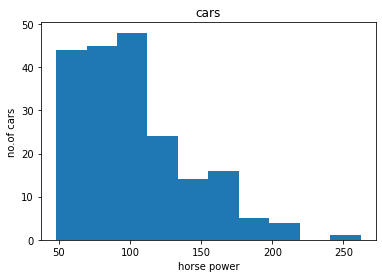

In [110]:
plt.hist(df['horsepower'])
plt.title('cars')
plt.xlabel('horse power')
plt.ylabel('no.of cars')

In [111]:
#lets start bin....
bins = np.linspace(min(df.horsepower),max(df.horsepower),num=4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [112]:
group_names = ['low','medium','high']
df['horsepower_binned'] = pd.cut(df.horsepower,bins,labels=group_names,include_lowest=True)
df[['horsepower','horsepower_binned']].head()

,horsepower,horsepower_binned
0,111.0,low
1,111.0,low
2,154.0,medium
3,102.0,low
4,115.0,low


Text(0, 0.5, 'no.of cars')

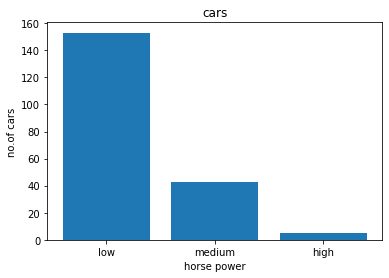

In [113]:
plt.bar(group_names,df.horsepower_binned.value_counts())
plt.title('cars')
plt.xlabel('horse power')
plt.ylabel('no.of cars')

In [114]:
df['highway_MPL_100km'] = 235.215/df['highway_mpg']
df['city_MPL_100km'] = 235.215/df['city_mpg']
df.head() #converted all gallons to liters ...

,symboling,normalized_losses,make,body_style,drive_wheels,engine_location,wheel_base,length,width,height,...,price,fuel_type_diesel,fuel_type_gas,aspiration_std,aspiration_turbo,num_of_doors_four,num_of_doors_two,horsepower_binned,highway_MPL_100km,city_MPL_100km
0,3,122.0,alfa-romero,convertible,rwd,front,88.6,168.8,64.1,48.8,...,13495.0,0,1,1,0,0,1,low,8.711667,11.200714
1,3,122.0,alfa-romero,convertible,rwd,front,88.6,168.8,64.1,48.8,...,16500.0,0,1,1,0,0,1,low,8.711667,11.200714
2,1,122.0,alfa-romero,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,16500.0,0,1,1,0,0,1,medium,9.046731,12.379737
3,2,164.0,audi,sedan,fwd,front,99.8,176.6,66.2,54.3,...,13950.0,0,1,1,0,1,0,low,7.840500,9.800625
4,2,164.0,audi,sedan,4wd,front,99.4,176.6,66.4,54.3,...,17450.0,0,1,1,0,1,0,low,10.691591,13.067500


# Data Cleaned lets analyse for data for predictions...

In [115]:
import scipy as sc

In [116]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(exclude=['int64','float64']).columns

In [117]:
df[num_cols].describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,highway_MPL_100km,city_MPL_100km
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,8.052317,9.953243
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,1.842423,2.536918
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.355833,4.800306
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,6.918088,7.840500
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,7.840500,9.800625
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,9.408600,12.379737
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,14.700938,18.093462


,normalized_losses,price
normalized_losses,1.000000,0.133999
price,0.133999,1.000000


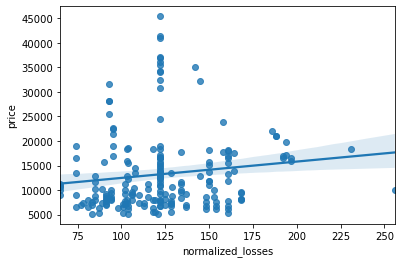

In [118]:
sns.regplot(x='normalized_losses',y='price',data=df)
df[['normalized_losses','price']].corr()

,wheel_base,price
wheel_base,1.000000,0.584642
price,0.584642,1.000000


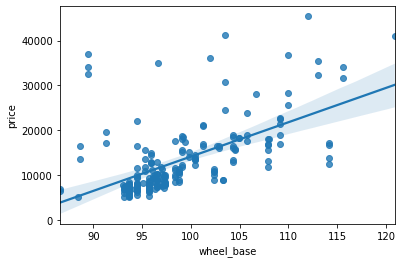

In [119]:
sns.regplot(x='wheel_base',y='price',data=df)
df[['wheel_base','price']].corr()

,length,price
length,1.000000,0.690628
price,0.690628,1.000000


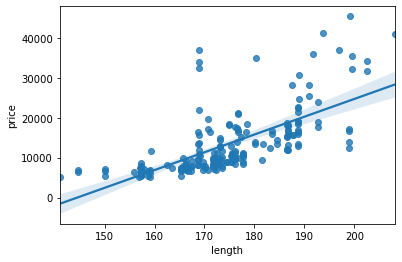

In [120]:
sns.regplot(x='length',y='price',data=df)
df[['length','price']].corr()

,width,price
width,1.000000,0.751265
price,0.751265,1.000000


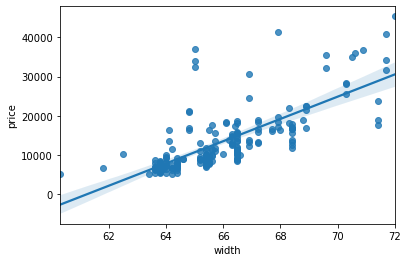

In [121]:
sns.regplot(x='width',y='price',data=df)
df[['width','price']].corr()

,height,price
height,1.000000,0.135486
price,0.135486,1.000000


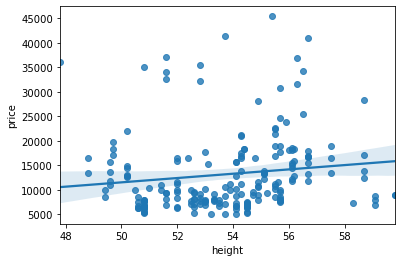

In [122]:
sns.regplot(x='height',y='price',data=df)
df[['height','price']].corr()

,bore,price
bore,1.000000,0.543155
price,0.543155,1.000000


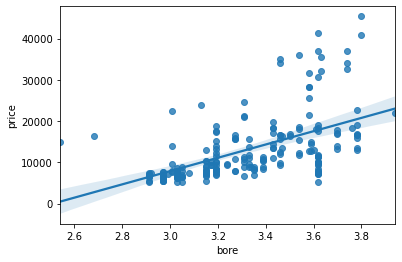

In [123]:
sns.regplot(x='bore',y='price',data=df)
df[['bore','price']].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


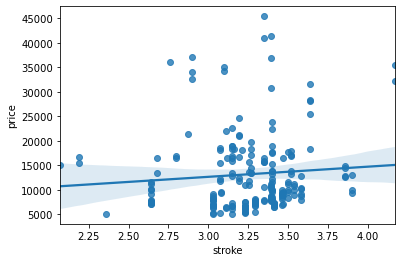

In [124]:
sns.regplot(x='stroke',y='price',data=df)
df[['stroke','price']].corr()

,compression_ratio,price
compression_ratio,1.000000,0.071107
price,0.071107,1.000000


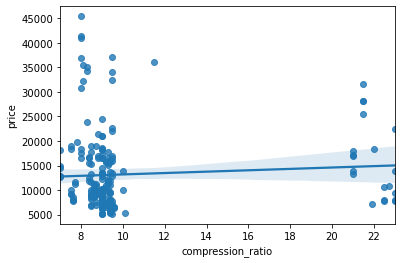

In [125]:
sns.regplot(x='compression_ratio',y='price',data=df)
df[['compression_ratio','price']].corr()

,horsepower,price
horsepower,1.000000,0.809575
price,0.809575,1.000000


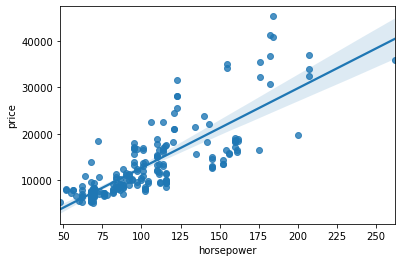

In [126]:
sns.regplot(x='horsepower',y='price',data=df)
df[['horsepower','price']].corr()

,peak_rpm,price
peak_rpm,1.000000,-0.101616
price,-0.101616,1.000000


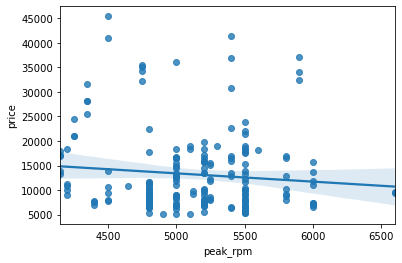

In [127]:
sns.regplot(x='peak_rpm',y='price',data=df)
df[['peak_rpm','price']].corr()

,highway_mpg,price
highway_mpg,1.000000,-0.704692
price,-0.704692,1.000000


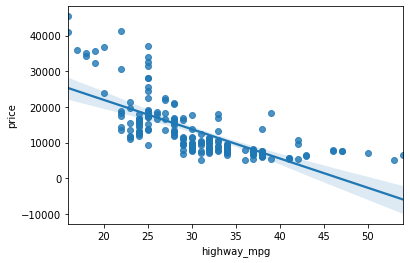

In [128]:
sns.regplot(x='highway_mpg',y='price',data=df)
df[['highway_mpg','price']].corr()

,city_mpg,price
city_mpg,1.000000,-0.686571
price,-0.686571,1.000000


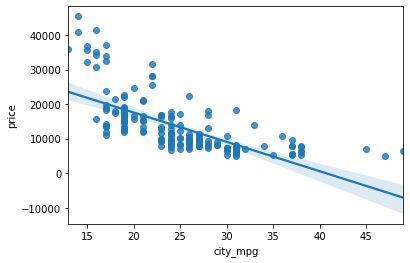

In [129]:
sns.regplot(x='city_mpg',y='price',data=df)
df[['city_mpg','price']].corr()

### Categorical columns...

In [130]:
df[cat_cols].head(2)

,make,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system,fuel_type_diesel,fuel_type_gas,aspiration_std,aspiration_turbo,num_of_doors_four,num_of_doors_two,horsepower_binned
0,alfa-romero,convertible,rwd,front,dohc,four,mpfi,0,1,1,0,0,1,low
1,alfa-romero,convertible,rwd,front,dohc,four,mpfi,0,1,1,0,0,1,low


<AxesSubplot:xlabel='make', ylabel='price'>

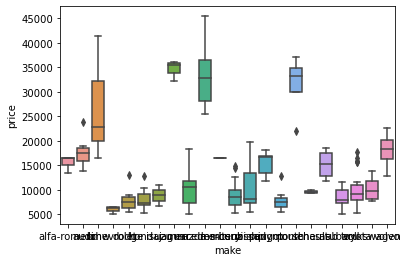

In [131]:
sns.boxplot(x='make',y='price',data=df)

<AxesSubplot:xlabel='body_style', ylabel='price'>

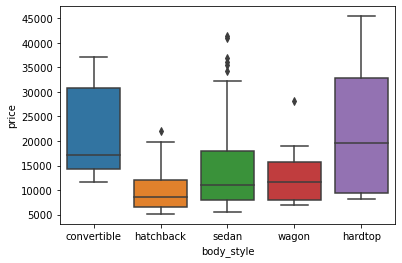

In [132]:
sns.boxplot(x='body_style',y='price',data=df)

<AxesSubplot:xlabel='engine_type', ylabel='price'>

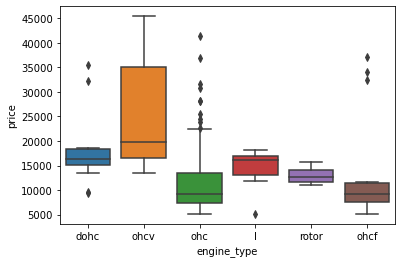

In [133]:
sns.boxplot(x='engine_type',y='price',data=df)

<AxesSubplot:xlabel='num_of_cylinders', ylabel='price'>

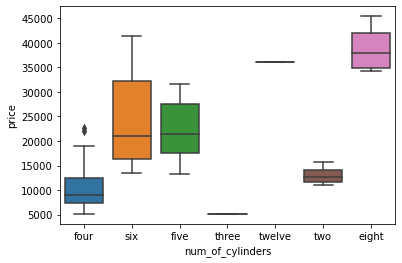

In [134]:
sns.boxplot(x='num_of_cylinders',y='price',data=df)

<AxesSubplot:xlabel='fuel_system', ylabel='price'>

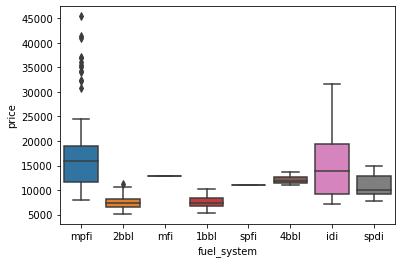

In [135]:
sns.boxplot(x='fuel_system',y='price',data=df)

<AxesSubplot:xlabel='fuel_type_gas', ylabel='price'>

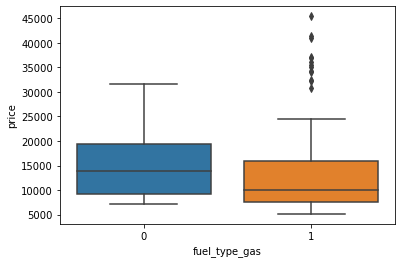

In [136]:
sns.boxplot(x='fuel_type_gas',y='price',data=df)

<AxesSubplot:xlabel='aspiration_std', ylabel='price'>

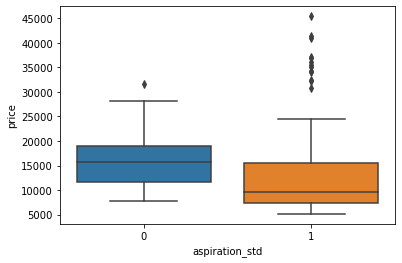

In [137]:
sns.boxplot(x='aspiration_std',y='price',data=df)

<AxesSubplot:xlabel='aspiration_turbo', ylabel='price'>

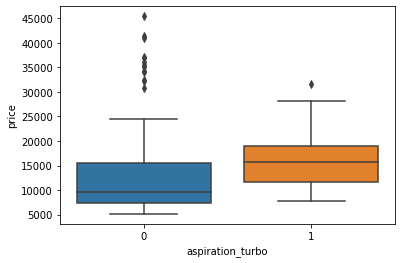

In [138]:
sns.boxplot(x='aspiration_turbo',y='price',data=df)

<AxesSubplot:xlabel='num_of_doors_four', ylabel='price'>

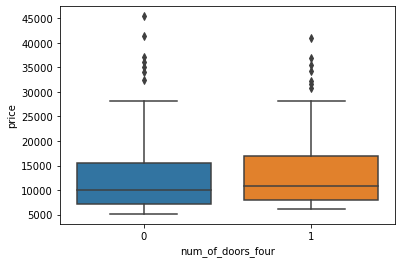

In [139]:
sns.boxplot(x='num_of_doors_four',y='price',data=df)

<AxesSubplot:xlabel='num_of_doors_two', ylabel='price'>

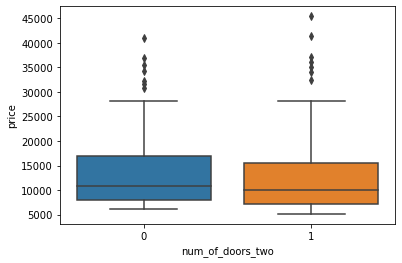

In [140]:
sns.boxplot(x='num_of_doors_two',y='price',data=df)

<AxesSubplot:xlabel='engine_location', ylabel='price'>

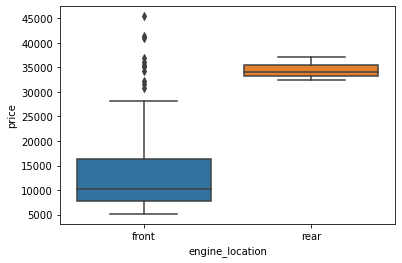

In [141]:
sns.boxplot(x='engine_location',y='price',data=df)

<AxesSubplot:xlabel='drive_wheels', ylabel='price'>

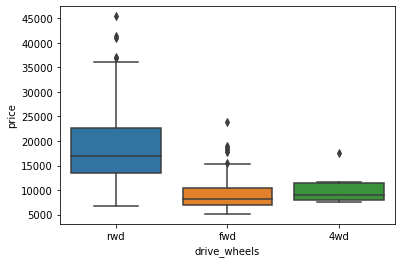

In [142]:
sns.boxplot(x='drive_wheels',y='price',data=df)

<li> drive_wheels 
<li>engine_location
<li> These two variabel seems to be good predictors in categorical variables...

In [143]:
df.describe(include=['object'])

,make,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
count,201,201,201,201,201,201,201
unique,22,5,3,2,6,7,8
top,toyota,sedan,fwd,front,ohc,four,mpfi
freq,32,94,118,198,145,157,92


In [144]:
df['make'].value_counts().to_frame().head(5)

,make
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13


In [145]:
df['body_style'].value_counts().to_frame()

,body_style
sedan,94
hatchback,68
wagon,25
hardtop,8
convertible,6


In [146]:
df['engine_type'].value_counts().to_frame()

,engine_type
ohc,145
ohcf,15
ohcv,13
dohc,12
l,12
rotor,4


In [147]:
drive_weels_counts = df['drive_wheels'].value_counts().to_frame()
drive_weels_counts.rename({'drive_wheels':'value_counts'},axis=1)

,value_counts
fwd,118
rwd,75
4wd,8


In [148]:
engine_location_counts = df['engine_location'].value_counts().to_frame()
engine_location_counts.rename({'engine_location':'value_counts'},axis=1)

,value_counts
front,198
rear,3


## Grouping

In [149]:
df_group_one = df[['drive_wheels','body_style','price']]
df_group_one = df_group_one.groupby(['drive_wheels'],as_index=False).mean()
df_group_one

,drive_wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


rwd wheels seems the expensive cars

In [150]:
df_group_test_1 =  df[['drive_wheels','body_style','price']]
df_group_test_1 = df_group_test_1.groupby(['drive_wheels','body_style'],as_index=False).mean()
df_group_test_1.sort_values(by='drive_wheels')

,drive_wheels,body_style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [151]:
group_pivot_1 = df_group_test_1.pivot(index='drive_wheels',columns='body_style')
group_pivot_1.fillna(0,inplace=True)
group_pivot_1

price                                            \
body_style   convertible       hardtop     hatchback         sedan   
drive_wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body_style           wagon  
drive_wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

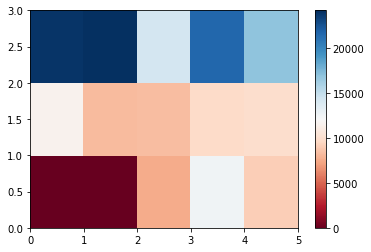

In [152]:
## Lets see the pivoted relationship between price , drive wheels and body_style in heat map

plt.pcolor(group_pivot_1,cmap='RdBu')
plt.colorbar()
plt.show()

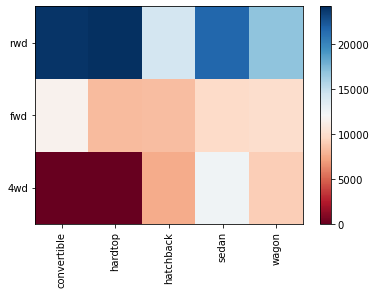

In [153]:
fig, ax = plt.subplots()
im = ax.pcolor(group_pivot_1, cmap='RdBu')

#label names
row_labels = group_pivot_1.columns.levels[1]
col_labels = group_pivot_1.index

#move ticks and labels to the center
ax.set_xticks(np.arange(group_pivot_1.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group_pivot_1.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

# Anslysis of Variance

In [154]:
df.corr()['price'].sort_values()

highway_mpg         -0.704692
city_mpg            -0.686571
aspiration_std      -0.179578
fuel_type_gas       -0.110326
peak_rpm            -0.101616
symboling           -0.082391
num_of_doors_two    -0.042435
num_of_doors_four    0.042435
compression_ratio    0.071107
stroke               0.082269
fuel_type_diesel     0.110326
normalized_losses    0.133999
height               0.135486
aspiration_turbo     0.179578
bore                 0.543155
wheel_base           0.584642
length               0.690628
width                0.751265
city_MPL_100km       0.789898
highway_MPL_100km    0.801118
horsepower           0.809575
curb_weight          0.834415
engine_size          0.872335
price                1.000000
Name: price, dtype: float64

In [155]:
#categorical data person corealtion and p-value

In [156]:
from scipy import stats

In [157]:
for col in num_cols:
    p_coef , p_value = stats.pearsonr(df[col],df['price'])

    print(col,'\nperson_corelation for',col ,'is : ',p_coef,'P-value is :',p_value,'\n')

symboling 
person_corelation for symboling is :  -0.08239118716962358 P-value is : 0.2449148765716521 

normalized_losses 
person_corelation for normalized_losses is :  0.13399873429274334 P-value is : 0.05789749352703121 

wheel_base 
person_corelation for wheel_base is :  0.5846418222655081 P-value is : 8.076488270732989e-20 

length 
person_corelation for length is :  0.6906283804483642 P-value is : 8.016477466158759e-30 

width 
person_corelation for width is :  0.7512653440522672 P-value is : 9.20033551048217e-38 

height 
person_corelation for height is :  0.1354863075680597 P-value is : 0.055146273251013435 

curb_weight 
person_corelation for curb_weight is :  0.8344145257702846 P-value is : 2.1895772388936914e-53 

engine_size 
person_corelation for engine_size is :  0.8723351674455185 P-value is : 9.265491622198389e-64 

bore 
person_corelation for bore is :  0.5431553832626602 P-value is : 8.049189483935489e-17 

stroke 
person_corelation for stroke is :  0.08226928855325809

### Analysis of Variance

In [158]:
df_group = df[['drive_wheels','body_style','price']]
df_group_1 = df_group[['drive_wheels','price']].groupby(['drive_wheels'])
df_group_1.head(3)

,drive_wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
140,4wd,7603.0
144,4wd,9233.0


In [159]:
df_group_1['drive_wheels'].unique()

drive_wheels
4wd    [4wd]
fwd    [fwd]
rwd    [rwd]
Name: drive_wheels, dtype: object

#### Fwd vs rwd vs 4wd

In [160]:
f_val,p_val = stats.f_oneway(df_group_1.get_group('4wd')['price'],df_group_1.get_group('rwd')['price'],df_group_1.get_group('fwd')['price'])

print("F- value : ",f_val,'\nP-value : ',p_val)

F- value :  67.95406500780402 
P-value :  3.3945443577150617e-23


#### 4wd vs rwd

In [161]:

f_val,p_val = stats.f_oneway(df_group_1.get_group('4wd')['price'],df_group_1.get_group('rwd')['price'])

print("F- value : ",f_val,'\nP-value : ',p_val)

F- value :  8.580681368924756 
P-value :  0.004411492211225333


#### 4wd vs fwd

In [162]:
f_val,p_val = stats.f_oneway(df_group_1.get_group('4wd')['price'],df_group_1.get_group('fwd')['price'])

print("F- value : ",f_val,'\nP-value : ',p_val)

F- value :  0.665465750252303 
P-value :  0.41620116697845666


#### rwd vs fwd

In [163]:
f_val,p_val = stats.f_oneway(df_group_1.get_group('rwd')['price'],df_group_1.get_group('fwd')['price'])

print("F- value : ",f_val,'\nP-value : ',p_val)

F- value :  130.55331609591104 
P-value :  2.235530635567824e-23


### Final columns we should use..

### numerical data...

<li> wheel_base
<li> length
<li> width
<li> curb_wight
<li> engine_size
<li> bore
<li> horsepower
<li> city mpg
<li> highway_mpg

<br> </br>
<li> <b> Catergorical data </b>
<li> Drive_wheels

In [164]:
features = ['wheel_base','length','width','curb_weight','engine_size','bore','horsepower',\
            'city_mpg','highway_mpg']
x=df[features]
Y = df['price']
print(features)

['wheel_base', 'length', 'width', 'curb_weight', 'engine_size', 'bore', 'horsepower', 'city_mpg', 'highway_mpg']


### Simeple Linear Regression

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [166]:
lm = LinearRegression()

#### Wheel base

,wheel_base,price
wheel_base,1.000000,0.584642
price,0.584642,1.000000


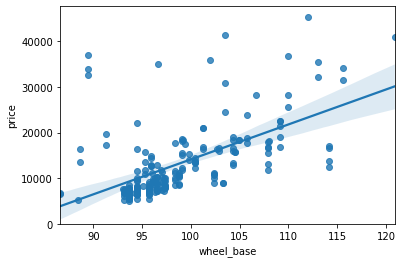

In [167]:
width = 6
hight = 4

plt.figure(figsize=(width,hight))
sns.regplot(x='wheel_base',y='price',data=df)
plt.ylim(0,)
df[['wheel_base','price']].corr()

,length,price
length,1.000000,0.690628
price,0.690628,1.000000


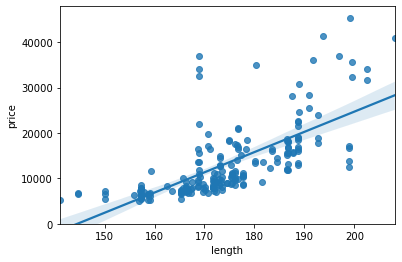

In [168]:
plt.figure(figsize=(width,hight))
sns.regplot(x='length',y='price',data=df)
plt.ylim(0,)
df[['length','price']].corr()

,width,price
width,1.000000,0.751265
price,0.751265,1.000000


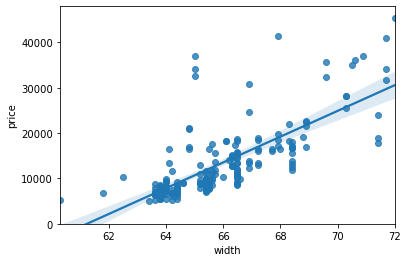

In [169]:
plt.figure(figsize=(width,hight))
sns.regplot(x='width',y='price',data=df)
plt.ylim(0,)
df[['width','price']].corr()

,curb_weight,price
curb_weight,1.000000,0.834415
price,0.834415,1.000000


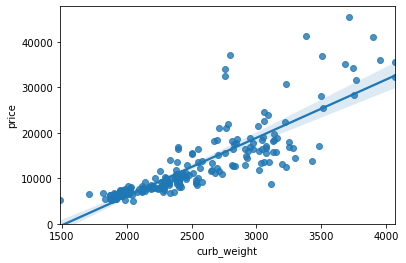

In [170]:
plt.figure(figsize=(width,hight))
sns.regplot(x='curb_weight',y='price',data=df)
plt.ylim(0,)
df[['curb_weight','price']].corr()

,engine_size,price
engine_size,1.000000,0.872335
price,0.872335,1.000000


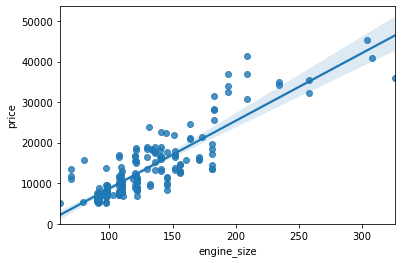

In [171]:
plt.figure(figsize=(width,hight))
sns.regplot(x='engine_size',y='price',data=df)
plt.ylim(0,)
df[['engine_size','price']].corr()

,bore,price
bore,1.000000,0.543155
price,0.543155,1.000000


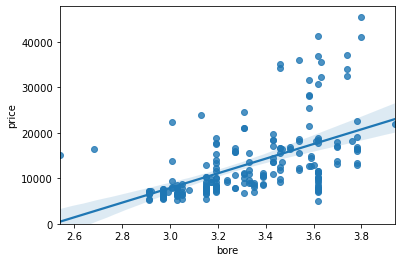

In [172]:
plt.figure(figsize=(width,hight))
sns.regplot(x='bore',y='price',data=df)
plt.ylim(0,)
df[['bore','price']].corr()

,horsepower,price
horsepower,1.000000,0.809575
price,0.809575,1.000000


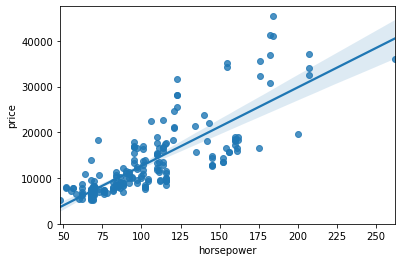

In [173]:
plt.figure(figsize=(width,hight))
sns.regplot(x='horsepower',y='price',data=df)
plt.ylim(0,)
df[['horsepower','price']].corr()

,city_mpg,price
city_mpg,1.000000,-0.686571
price,-0.686571,1.000000


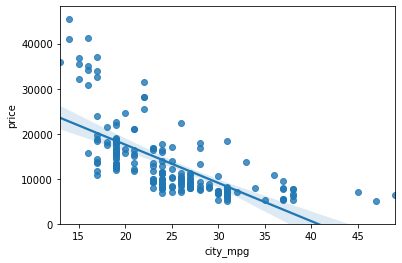

In [174]:
plt.figure(figsize=(width,hight))
sns.regplot(x='city_mpg',y='price',data=df)
plt.ylim(0,)
df[['city_mpg','price']].corr()

,highway_mpg,price
highway_mpg,1.000000,-0.704692
price,-0.704692,1.000000


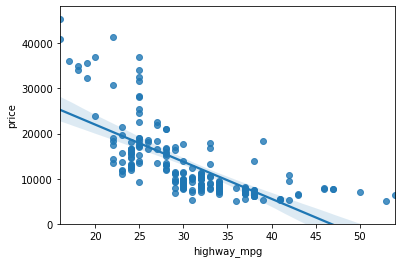

In [175]:
plt.figure(figsize=(width,hight))
sns.regplot(x='highway_mpg',y='price',data=df)
plt.ylim(0,)
df[['highway_mpg','price']].corr()

In [176]:
for col in features:
    lm.fit(df[[col]],Y)
    print(col,'score is :' ,lm.score(df[[col]],Y),'\n')

wheel_base score is : 0.3418060603419337 

length score is : 0.47696755988073036 

width score is : 0.5643996171739716 

curb_weight score is : 0.6962476008164488 

engine_size score is : 0.7609686443622008 

bore score is : 0.29501777036720744 

horsepower score is : 0.6554109795391572 

city_mpg score is : 0.4713797473570377 

highway_mpg score is : 0.4965911884339175 



In [177]:
print(features)

['wheel_base', 'length', 'width', 'curb_weight', 'engine_size', 'bore', 'horsepower', 'city_mpg', 'highway_mpg']


In [178]:
Z = ['engine_size', 'curb_weight','horsepower', 'highway_mpg']
lm.fit(df[Z],Y)
preds = lm.predict(df[Z])
lm.score(df[Z],Y)

0.8093562806577457

C:\Users\Bala Krishna Baddi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Bala Krishna Baddi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


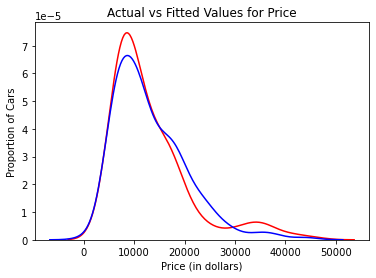

In [179]:
## Distibution plot...

ax1 = sns.distplot(df['price'],hist=False,color='r',label='Actual Value')
sns.distplot(preds,hist=False,color='b',label='fitted values',ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

### Polynomial Regression

In [180]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


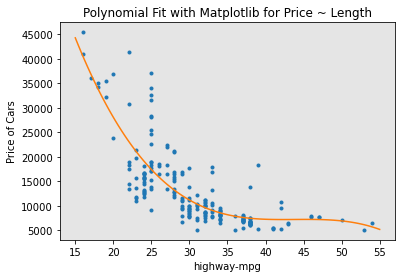

In [181]:
# Here we use a polynomial of the 3rd order (cubic) 
x = df['highway_mpg']
y = df['price']
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)
PlotPolly(p, x, y, 'highway-mpg')

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


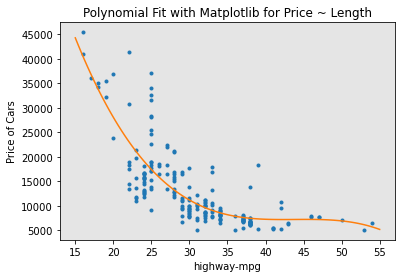

In [182]:
# Here we use a polynomial of the 3rd order (cubic) 
x = df['highway_mpg']
y = df['price']
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)
PlotPolly(p, x, y, 'highway-mpg')

In [183]:
from sklearn.preprocessing import PolynomialFeatures

In [184]:
#create polinominl object with degree =2 

pr = PolynomialFeatures(degree=2)
pf

NameError: name 'pf' is not defined

In [ ]:
Z_pr = pr.fit_transform(df[Z])
print(df[Z].shape)

In [ ]:
Z_pr.shape

### Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
my_pipeline_1 = Pipeline([
    ('scalar',StandardScaler()),
    ('polynomial',PolynomialFeatures(include_bias=False)),
    ('model',LinearRegression())])

In [ ]:
my_pipeline_1.fit(df[Z],Y)

In [ ]:
preds = my_pipeline_1.predict(df[Z])
preds[0:4]

### Comparision models.

##### Linera regression

In [ ]:
# horsepower fit

lm = LinearRegression()
lm.fit(df[['horsepower']],Y)
preds1 = lm.predict(df[['horsepower']])
print('r 2 values is : ',lm.score(df[['horsepower']],y))
print('mse is : ',mean_squared_error(preds1,y))
preds1[0:5].round()

#### multiple liner regression

In [ ]:
#multiple liner regression
lm = LinearRegression()
lm.fit(df[Z],Y)
preds2 = lm.predict(df[Z])
print('r 2 values is : ',lm.score(df[Z],y))
print('mse is : ',mean_squared_error(preds2,y))
preds1[0:5].round()

#### polinominal regression

In [ ]:
#polyfit r2 score...
from sklearn.metrics import r2_score

In [ ]:
r_squared = r2_score(y,p(x))
print('r 2 values is : ',r_squared)
print('mse is : ',mean_squared_error(df['price'], p(x)))

### Multiple variabel linear regressino performed well...

<li>r 2 values is :  0.8093562806577457
<li>mse is :  11980366.87072649

In [ ]:
#new values pridctions...

new_input = np.arange(1,202,1).reshape(-1,1) #changed to scalar value...
new_input.shape

In [ ]:
#lets predict...

lm.fit(df[['horsepower']],y)
preds = lm.predict(new_input)
plt.plot(new_input,preds)
plt.xlabel('new price')
plt.ylabel('predicted price')

 ### Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor()

dt.fit(df[Z],Y)
preds = dt.predict(df[Z])
r_squared = r2_score(Y,preds)
print('r 2 values is : ',r_squared)
print('mse is : ',mean_squared_error(df['price'],preds))
sns.regplot(Y,preds)

In [186]:
df.to_csv('Automobiles_cleaned.csv',index=True)
print('saved')
Z

saved


['engine_size', 'curb_weight', 'horsepower', 'highway_mpg']